In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import chardet

In [3]:
#import dataset
dataset = pd.read_csv('dataset_pupuk.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:,-1].values
print(X)
print(y)

[[  65  521]
 [  25  261]
 [ 458 1024]
 [  23  922]
 [  67  190]
 [ 112  370]
 [ 106  895]
 [ 204  306]
 [ 101  331]
 [  99  197]]
[ 521  261 1024  922  190  370  895  306  331  197]


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
print(X_train)

[[ 99 197]
 [ 25 261]
 [106 895]
 [204 306]
 [ 23 922]
 [ 65 521]
 [112 370]]


In [5]:
print(X_test)

[[ 458 1024]
 [ 101  331]
 [  67  190]]


In [6]:
print(y_train)

[197 261 895 306 922 521 370]


In [7]:
print(y_test)

[1024  331  190]


In [8]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train)

[[ 0.14655231 -1.07861839]
 [-1.14012726 -0.84774355]
 [ 0.26826524  1.43936033]
 [ 1.97224629 -0.68540968]
 [-1.17490239  1.53676065]
 [-0.44462479  0.09018548]
 [ 0.37259061 -0.45453484]]


In [9]:
#Training Naive Bayes model on Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [10]:
#Predicting the Test set results
y_pred = classifier.predict(X_test)

In [11]:
#Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[0 1 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 1 0]
 [0 0 0 0 0 0]
 [0 0 1 0 0 0]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

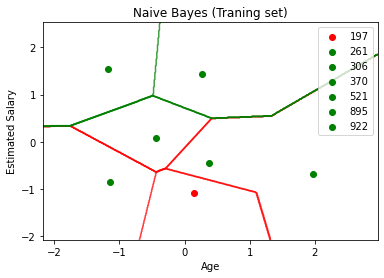

In [12]:
#Visualising the Training set result
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01), 
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contour(X1, X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap= ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
              c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Traning set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


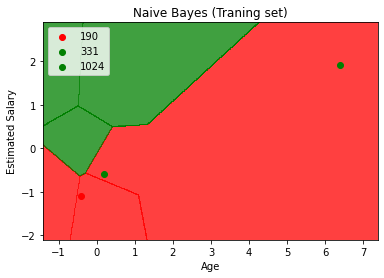

In [13]:
#Visualising the Test set result
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01), 
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap= ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
              c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Traning set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()